In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
X,y=load_iris(return_X_y=True)

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

In [7]:
model=Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
es=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [18]:
checkpoint=ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [20]:
lr=ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-6,
    verbose=1
)

In [21]:
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32,callbacks=[es,checkpoint,lr])

Epoch 1/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9688 - loss: 0.0765
Epoch 1: val_loss improved from None to 0.08120, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9643 - loss: 0.1245 - val_accuracy: 1.0000 - val_loss: 0.0812 - learning_rate: 5.0000e-04
Epoch 2/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8750 - loss: 0.2402
Epoch 2: val_loss did not improve from 0.08120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9554 - loss: 0.1288 - val_accuracy: 1.0000 - val_loss: 0.0941 - learning_rate: 5.0000e-04
Epoch 3/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9375 - loss: 0.1305
Epoch 3: val_loss did not improve from 0.08120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9375 - loss: 0.1231 - val_accuracy: 0.9737 - val_loss: 0.0949 - learning_rate: 5.0000e-04
Epoch 4/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9062 - loss: 0.1829
Epoch 4: val_loss did not improve from 0.08120
4/4 ━━━━━━━━━━━

In [26]:
model.save('iris_classifier.keras')

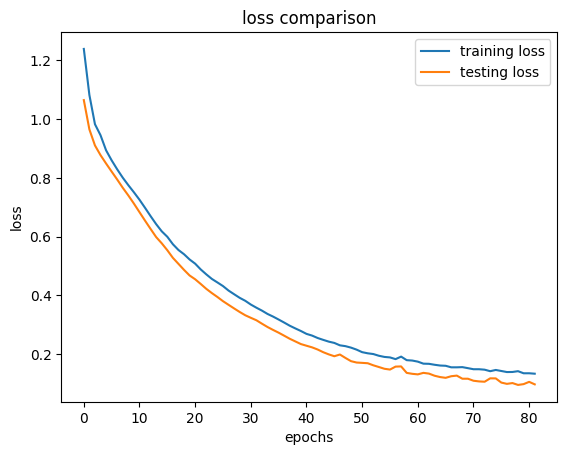

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='testing loss')
plt.title('loss comparison')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
import numpy as np
np.argmax(model.predict(np.array([[1,2,3,4]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


np.int64(2)

In [28]:
import tensorflow as tf

model=tf.keras.models.load_model('iris_classifier.keras')